In [5]:
from graphmodels.graphmodel import GraphModel, concatenate_graph_specs
from graphmodels.validation import score_model, plot_diagnostic, plot_baseline_vs_computation
import pandas as pd
import plotly.express as px
from sklearn.metrics import r2_score
from database import select_dataset
from models.Hermen.model_GE3 import GE3_models

from graphmodels.utils import df_to_data_dict, get_X_y_from_data

# Newer

In [6]:
pop = select_dataset('population')
#emissions = select_dataset('emissions')

In [7]:
emissions = pd.read_csv('models/Hermen/data/GY_GE_GU_GM_GP_GT.csv')

/home/simon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
model_df = pd.concat([emissions, pop])

In [9]:
model_df = model_df[~model_df.Item.isin(['All Animals'])]

In [10]:
from graphmodels.utils import df_to_data_dict
def get_X_y_from_data(model, data_dict):
    '''TO CLEAN UP'''
    X = {key: data_dict[key] for key in model.inputs_() + model.parameters_()}
    y = {key: data_dict[key] for key in model.variables_() + model.outputs_() if key in data_dict}
    return X, y


def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code]#.fillna(0)
    return X


def fill_missing_values(df):
    return df
#     return df.groupby(level='ISO').fillna(method='ffill')\
#              .groupby(level='ISO').fillna(method='bfill')


def df_to_data_dict(df, itemized):
    data_dict = {}

    non_item_df = df[~df.Variable.isin(itemized)].pivot(
        index=['ISO', 'Year'], columns='Variable', values='Value')
    non_item_df = fill_missing_values(non_item_df)
    item_df = df[df.Variable.isin(itemized)].pivot(
        index=['ISO', 'Year', 'Item'], columns='Variable', values='Value')

    data_dict.update(df_to_dict(non_item_df))
    data_dict.update(df_to_dict(item_df))

    return data_dict


In [11]:
itemized = ['TAi', 'EF_EEi', 'EECH4', 'TEE_CO2eq',
       'M_ASi', 'EF_ASi', 'E_ASi', 'TMA_CO2eq', 'M_Ti', 'EF_CH4Ti',
       'EF_Ti', 'E_TCH4i', 'E_Ti', 'TMT_CO2eq', 'M_LPi', 'EF_Li', 'E_Li',
       'TMP_CO2eq', 'TMi', 'MM_ASi', 'MM_LPi', 'MM_Ti', 'MYi',]

data_dict = df_to_data_dict(model_df, itemized)

In [12]:
res = []
for model_name, model in GE3_models.items():
    print(model_name)
    X, y = get_X_y_from_data(model, data_dict)
    print(score_model(model, X, y))
    print()

TMi_model
TMi
    r2  correlation          rmse Variable
0  1.0          1.0  1.016920e-15      TMi

M_xi_model
M_Ti
M_LPi
M_ASi
    r2  correlation          rmse Variable
0  1.0          1.0  3.249331e-16     M_Ti
1  1.0          1.0  3.635216e-16    M_LPi
2  1.0          1.0  2.520746e-16    M_ASi

TMP_CO2eq_model
TMP_CO2eq
         r2  correlation       rmse   Variable
0  0.999997     0.999999  17.092812  TMP_CO2eq

TMT_CO2eq_model
E_Ti
E_TCH4i
TMT_CO2eq
         r2  correlation          rmse   Variable
0  0.999992     0.999997  2.619308e-05       E_Ti
1  1.000000     1.000000  1.297824e-08    E_TCH4i
2  0.999997     0.999999  2.517425e+00  TMT_CO2eq

TMA_CO2eq_model
TMA_CO2eq
         r2  correlation      rmse   Variable
0  0.999993          1.0  1.136032  TMA_CO2eq

TEE_CO2eq_model
TEE_CO2eq
    r2  correlation          rmse   Variable
0  1.0          1.0  4.353519e-10  TEE_CO2eq

FE_CO2eq_model
FE_CO2eq
         r2  correlation         rmse  Variable
0  0.999987     0.999994  238

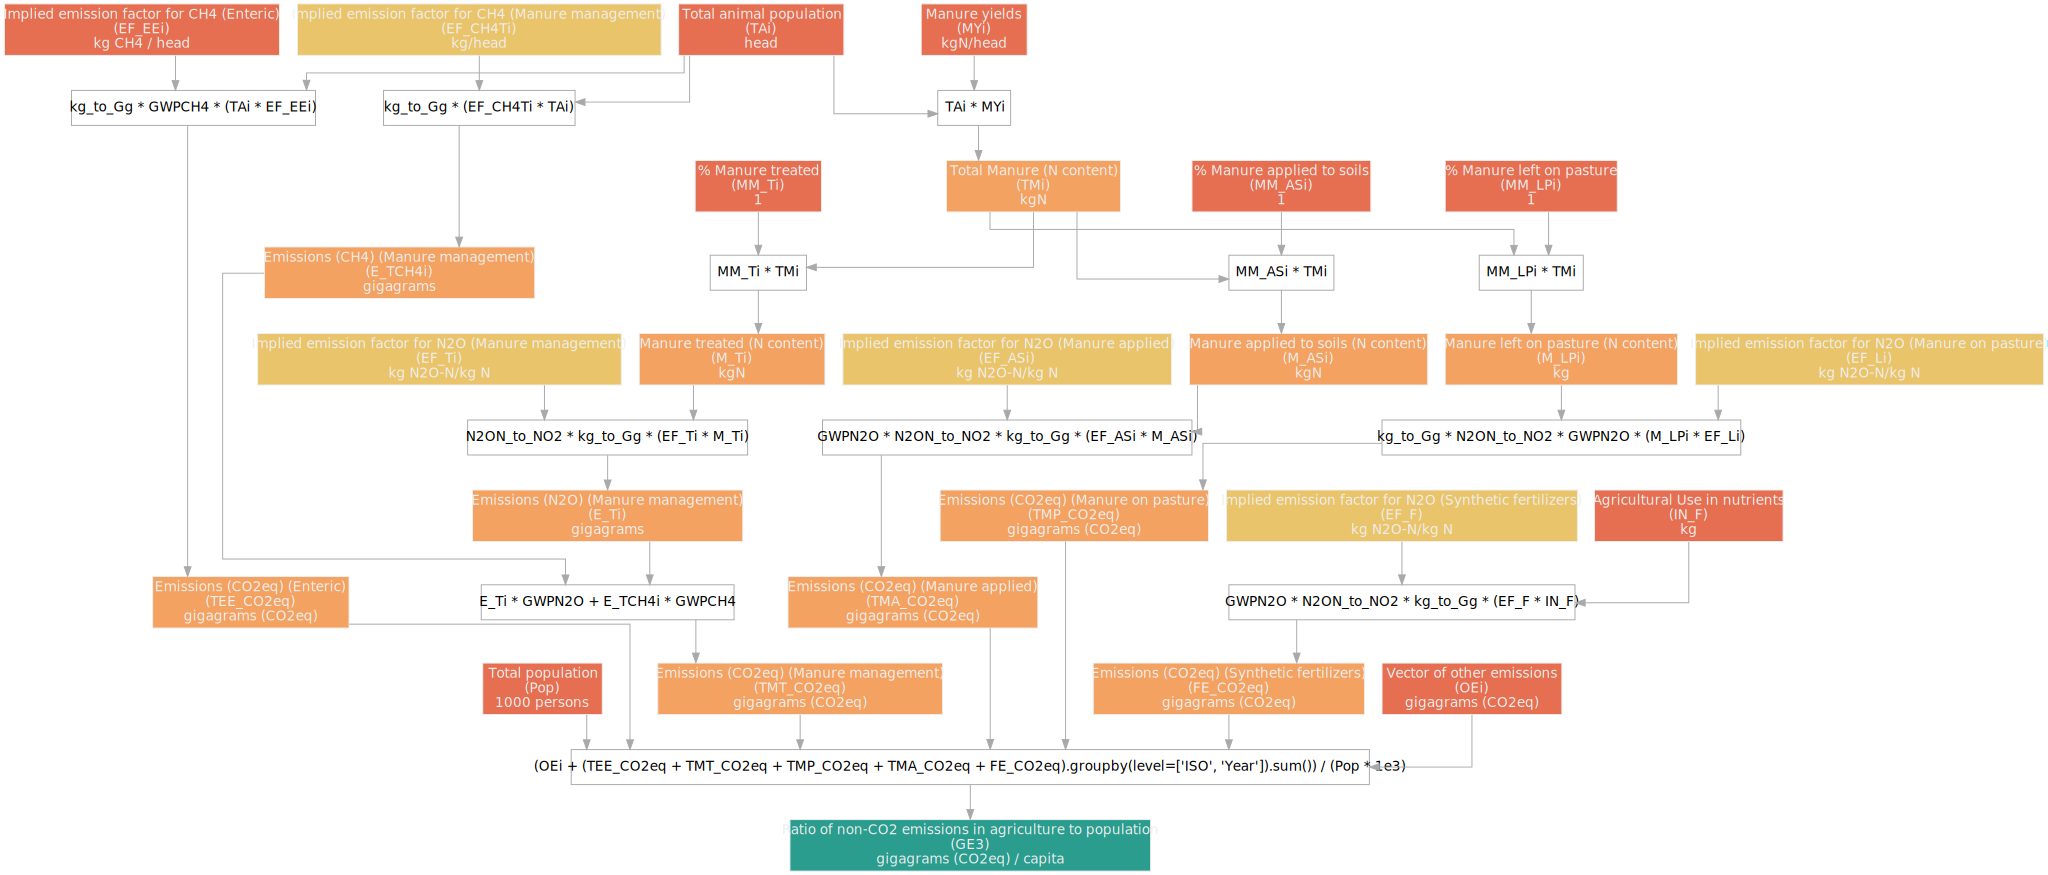

In [15]:
GE3_models['GE3_model'].draw()

 # Livestock

In [9]:
#livestock_df = select_dataset('livestock')
livestock_df = pd.read_csv('models/Hermen/data/QL.csv')#.rename(columns={'Element': 'Description', 'GGI_code': 'Variable'})

/home/simon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
itemized = livestock_df.dropna(subset=['emi_item']).Variable.unique()
itemized

array(['FPi', 'ANPi', 'AYi', 'PTTAi'], dtype=object)

In [11]:
a = livestock_df.query("Variable == 'PTTAi'").pivot(index=['ISO', 'Year', 'emi_item'], columns='Variable', values='Value')

In [12]:
b = livestock_df.query("Variable == 'FPi'").pivot(index=['ISO', 'Year', 'Item'], columns='Variable', values='Value')

In [13]:
livestock_df.query("Variable == 'FPi'").pivot(index=['ISO', 'Year', 'Item', 'emi_item'], columns='Variable', values='Value')

Variable                                              FPi
ISO Year Item                  emi_item                  
AFG 1961 Beef and Buffalo Meat Cattle, non-dairy  43000.0
         Eggs Primary          Chickens, layers   10000.0
         Eggs, hen, in shell   Chickens, layers   10000.0
         Hides, cattle, fresh  NaN                 7200.0
         Meat, Poultry         Poultry Birds       5600.0
...                                                   ...
ZWE 2019 Offals, sheep,edible  NaN                   78.0
         Sheep and Goat Meat   Sheep and Goats    25268.0
         Skins, goat, fresh    NaN                 4122.0
         Skins, sheep, fresh   NaN                   62.0
         Wool, greasy          NaN                 3287.0

[259066 rows x 1 columns]

In [14]:
livestock_df.query("Variable == 'AYi'").pivot(index=['ISO', 'Year', 'Item'], columns='Variable', values='Value')

Variable                             AYi
ISO Year Item                           
AFG 1961 Beef and Buffalo Meat  0.119400
         Meat, Poultry          0.000800
         Meat, camel            0.180000
         Meat, cattle           0.119400
         Meat, chicken          0.000800
...                                  ...
ZWE 2019 Meat, goat             0.012000
         Meat, pig              0.054900
         Meat, sheep            0.014000
         Meat, turkey           0.003968
         Sheep and Goat Meat    0.012000

[100779 rows x 1 columns]

In [ ]:
b = livestock_df.query("Variable == 'FPi'").groupby(['ISO', 'Year', 'emi_item', 'Variable'])['Value'].sum().reset_index().pivot(index=['ISO', 'Year', 'emi_item'], columns='Variable', values='Value')

In [ ]:
def get_X_y_from_data(model, data_dict):
    '''TO CLEAN UP'''
    X = {key: data_dict[key] for key in model.inputs_() + model.parameters_()}
    y = {key: data_dict[key] for key in model.variables_() + model.outputs_() if key in data_dict}
    return X, y


def df_to_dict(df):
    X = {}
    for code in df.columns:
        X[code] = df[code].fillna(0)
    return X


def fill_missing_values(df):
    return df
#     return df.groupby(level='ISO').fillna(method='ffill')\
#              .groupby(level='ISO').fillna(method='bfill')


def df_to_data_dict(df, itemized):
    data_dict = {}

    non_item_df = df[~df.Variable.isin(itemized)].pivot(
        index=['ISO', 'Year'], columns='Variable', values='Value')
    non_item_df = fill_missing_values(non_item_df)
    item_df = df[df.Variable.isin(itemized)].pivot(
        index=['ISO', 'Year','Item', 'emi_item'], columns='Variable', values='Value')

    data_dict.update(df_to_dict(non_item_df))
    data_dict.update(df_to_dict(item_df))

    return data_dict


In [ ]:
TAi_nodes = {'FPi': {'type': 'input',
                     'unit': 'tonnes',
                     'name': 'Production'},
             'AYi': {'type': 'input',
                     'unit': 'tonnes/head',
                     'name': 'Vector of animal yields'},
             'ANPi': {'type': 'variable',
                      'unit': 'head',
                      'name': 'Vector animals needed for production',
                      'computation': lambda FPi, AYi, **kwargs: FPi / AYi
                      },
             'PTTAi': {'type': 'parameter',
                       'unit': '1',
                       'name': 'vector production-to-total animals ratio',
                       },
             'TAi': {'type': 'output',
                     'unit': 'head',
                     'name': 'Vector total animal population',
                     'computation': lambda ANPi, PTTAi, **kwargs: PTTAi * ANPi.groupby(level=['ISO', 'Year', 'emi_item']).sum().rename_axis(index={"emi_item": 'Item'})
                     },
             }


In [ ]:
TAi_model = GraphModel(TAi_nodes)

In [ ]:
TAi_model.draw()

In [ ]:
data_dict = df_to_data_dict(livestock_df, itemized)

In [ ]:
X, y = get_X_y_from_data(TAi_model, data_dict)

res = TAi_model.run(X)

print(score_model(TAi_model, X, y))


In [ ]:
res['ANPi'].dropna()

In [ ]:
data_dict['PTTAi']

In [ ]:
res

In [ ]:
f

In [ ]:
X, y = get_X_y_from_data(model, data_dict)
#%time res = model.run(X)
print(score_model(model, X, y))


In [ ]:
res = []
for model_name, model in GE3_models.items():
    print(model_name)
    X, y = get_X_y_from_data(model, data_dict)
    #%time res = model.run(X)
    print(score_model(model, X, y))

    print()
